# California Dataset Project
- Sarah DeConink
- 06/22/2023

## Section 0-Setup

In [2]:
# enable the Matplotlib support
%matplotlib inline

## Section 1-Load Data

In [1]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
california = fetch_california_housing()

## Section 2-View Data

In [5]:
# display a description
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
# view the shape attributes of data
california.data.shape

(20640, 8)

In [7]:
# view the shape attributes of target
california.target.shape

(20640,)

In [8]:
# display the names that belong to each column in the data array
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## Section 3-Explore the data with Pandas

In [10]:
#import module
import pandas as pd

# set precision to 4 decimal places, maximum columns to 9, and width to auto-detect
pd.set_option('display.precision', 4)

pd.set_option('display.max_columns', 9)

pd.set_option('display.width', None)

In [11]:
# create a dataframe and add a column for median house values
california_df = pd.DataFrame(california.data, columns=california.feature_names)

california_df['MedHouseValue'] = pd.Series(california.target)


## Section 4-View

In [12]:
# view the first five rows of data
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


## Section 5-Describe

In [13]:
# get descriptive stats
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


## Section 6-Visualize

In [14]:
# sample the data
sample_df = california_df.sample(frac=0.1, random_state=17)

In [15]:
# import modules and setup
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

sns.set_style('whitegrid')

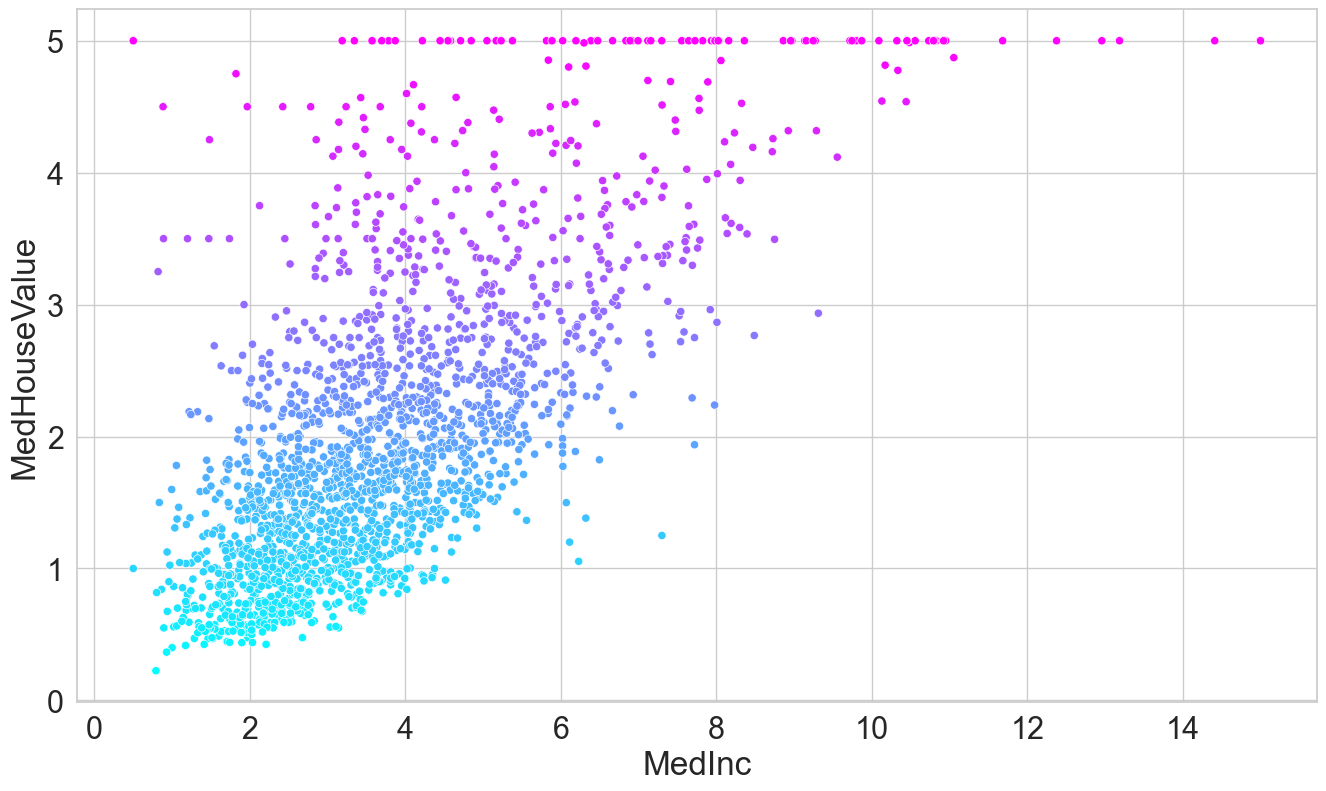

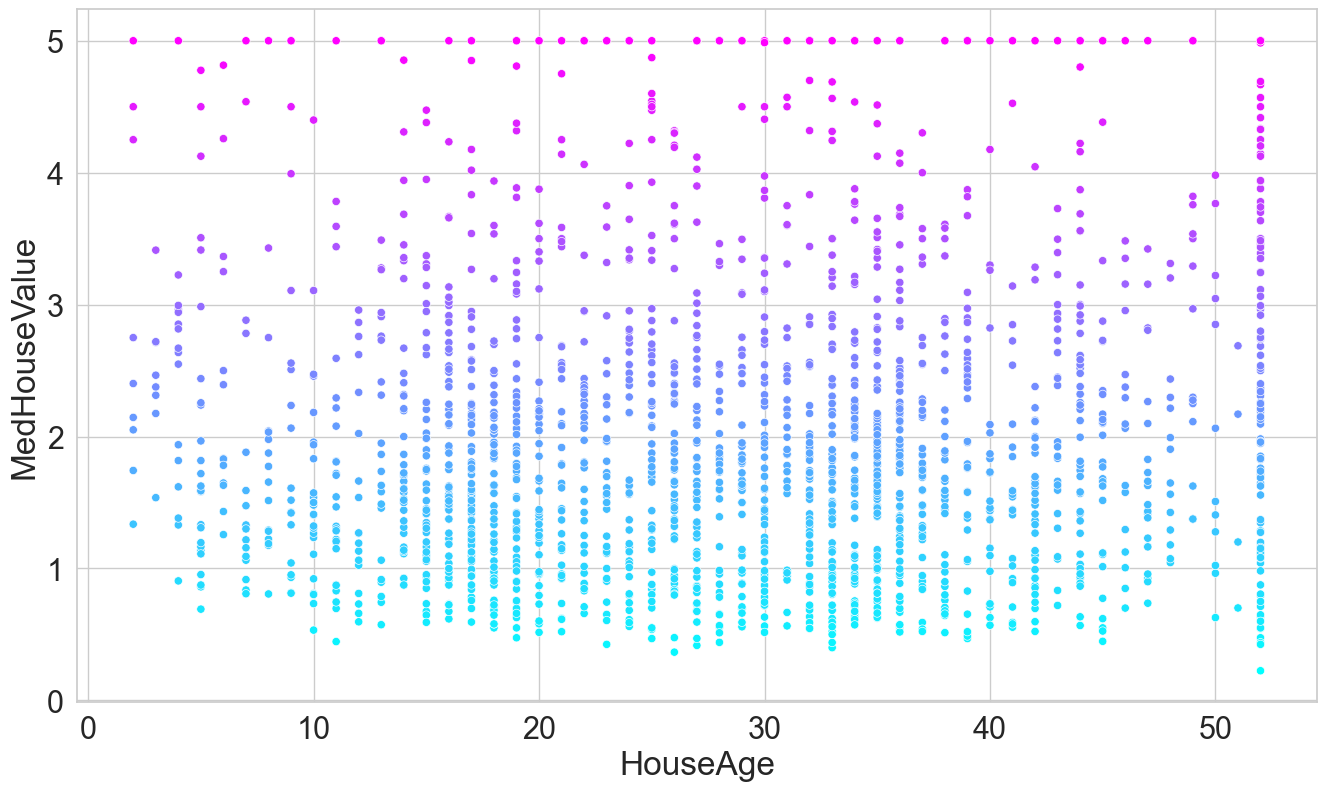

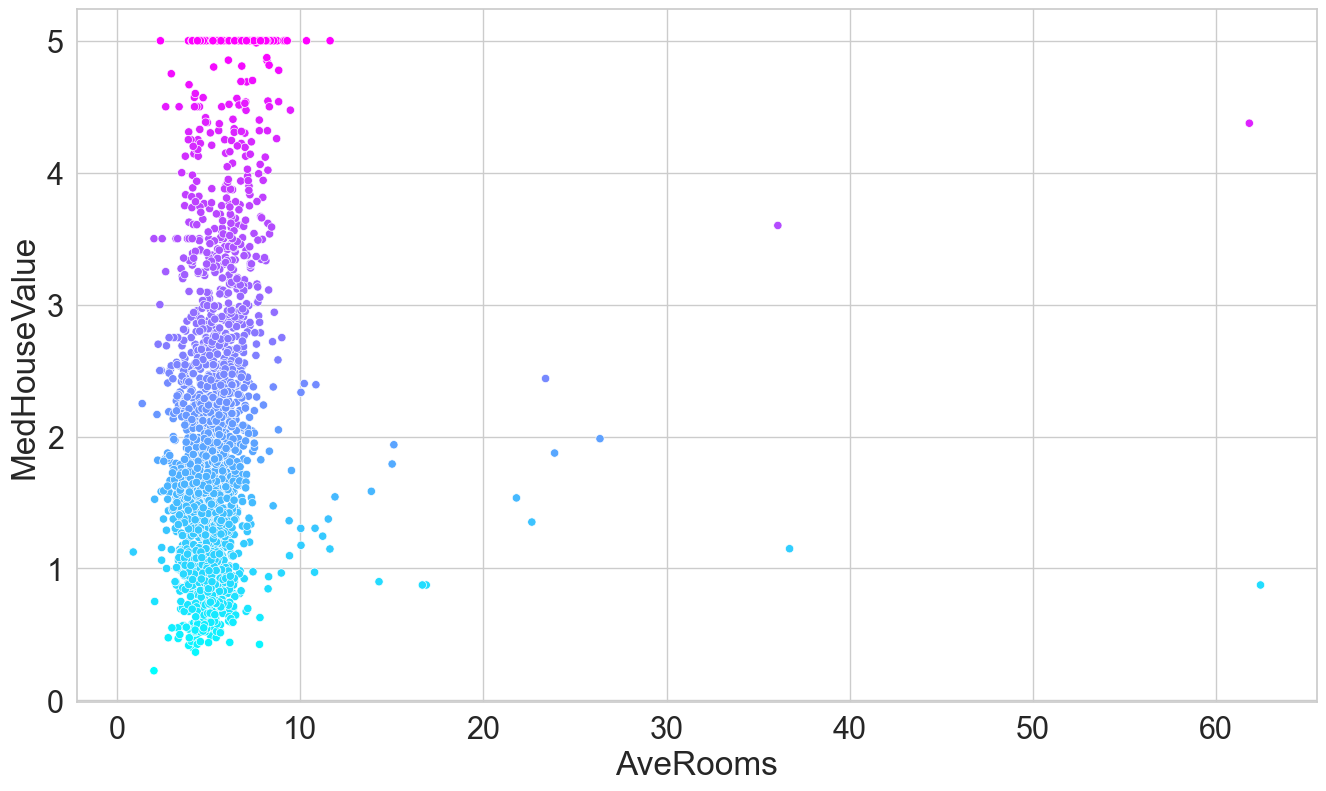

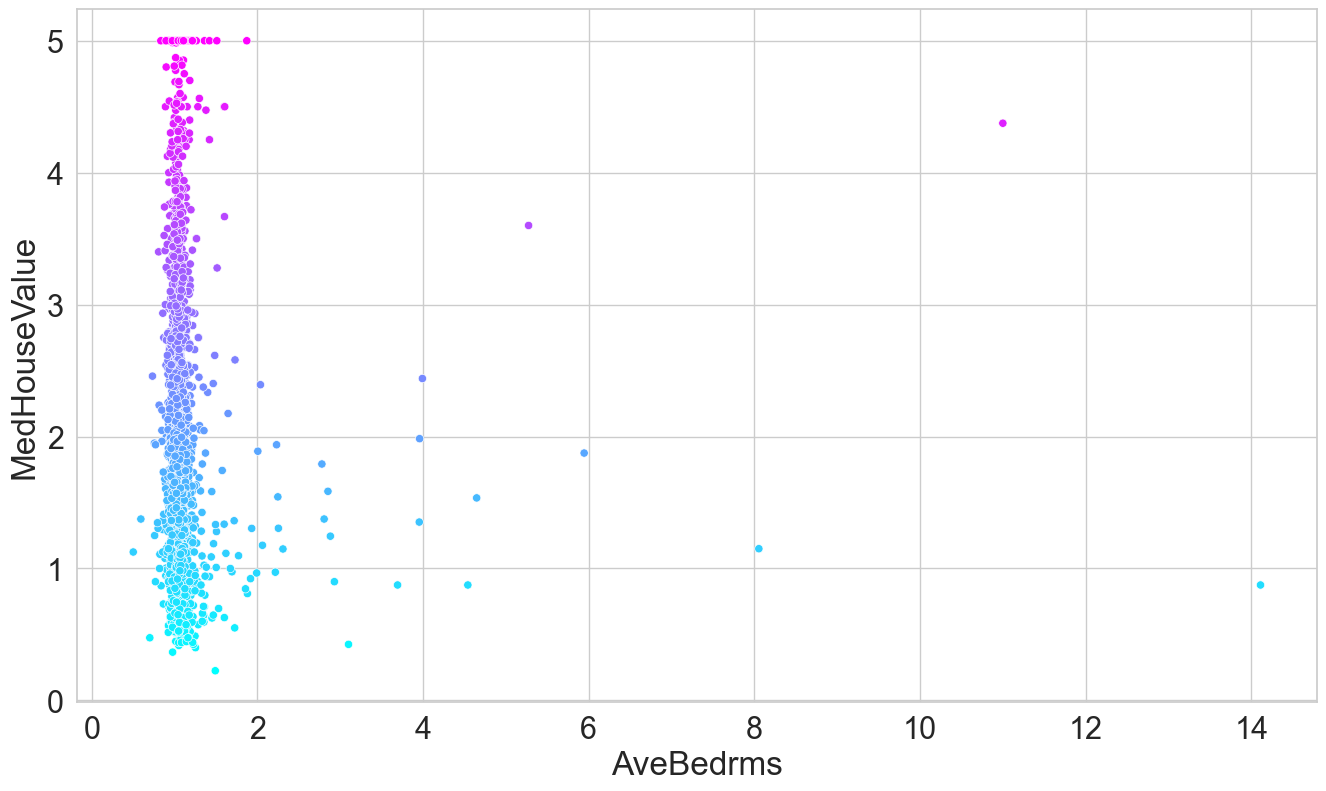

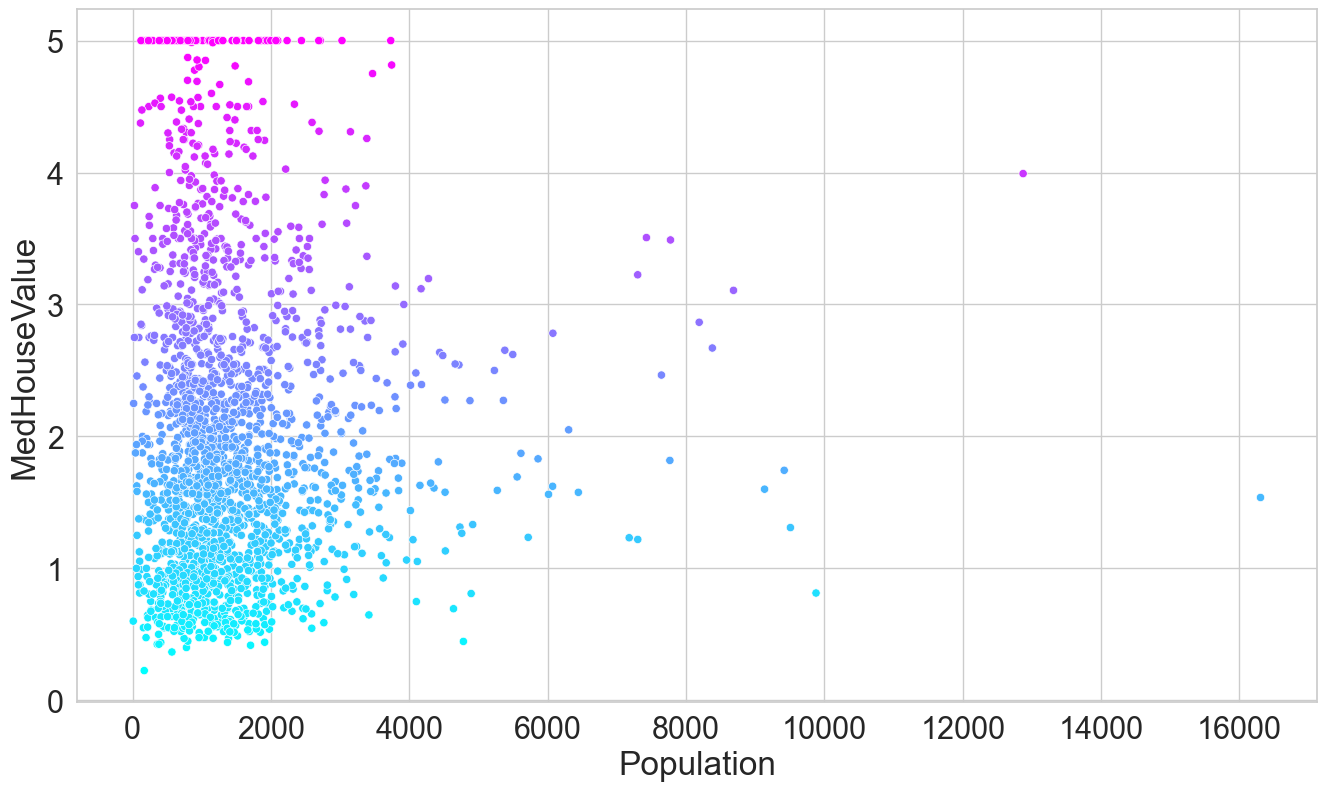

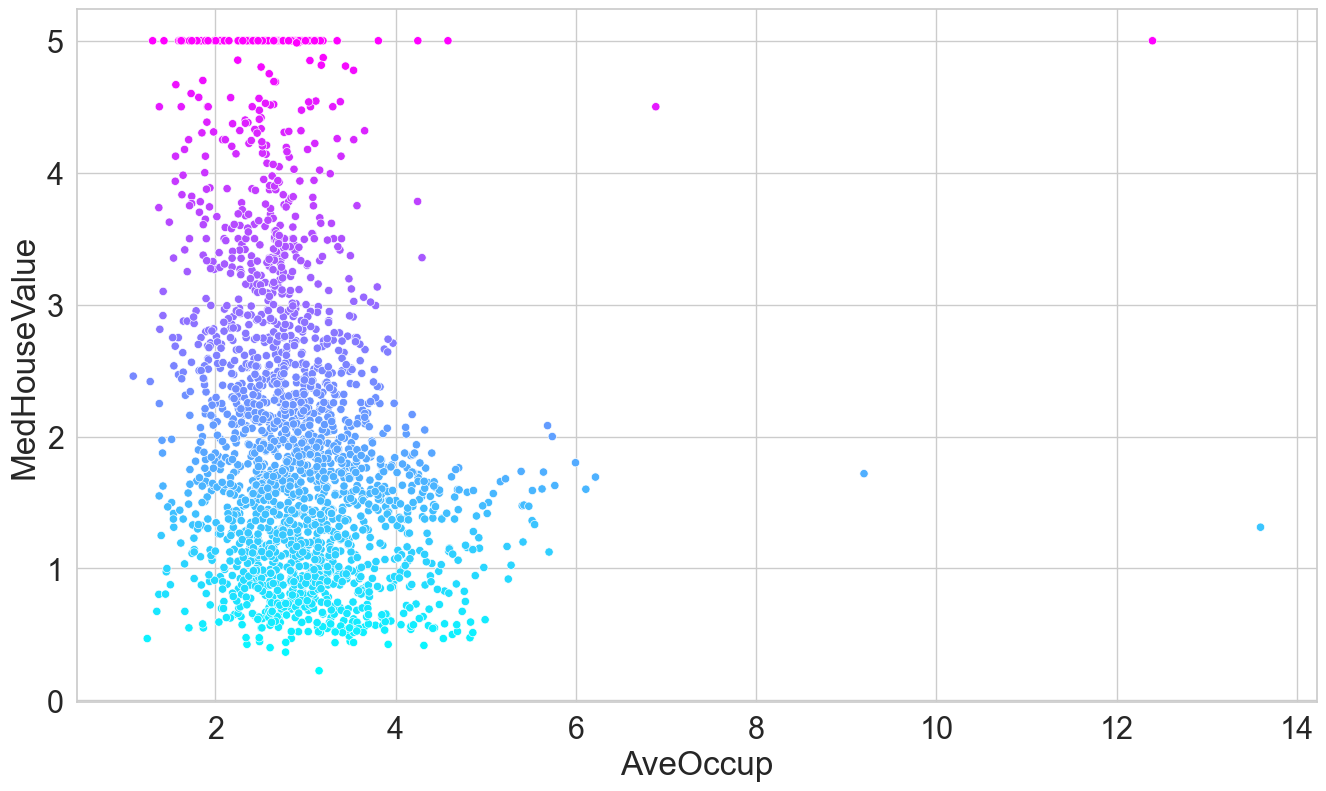

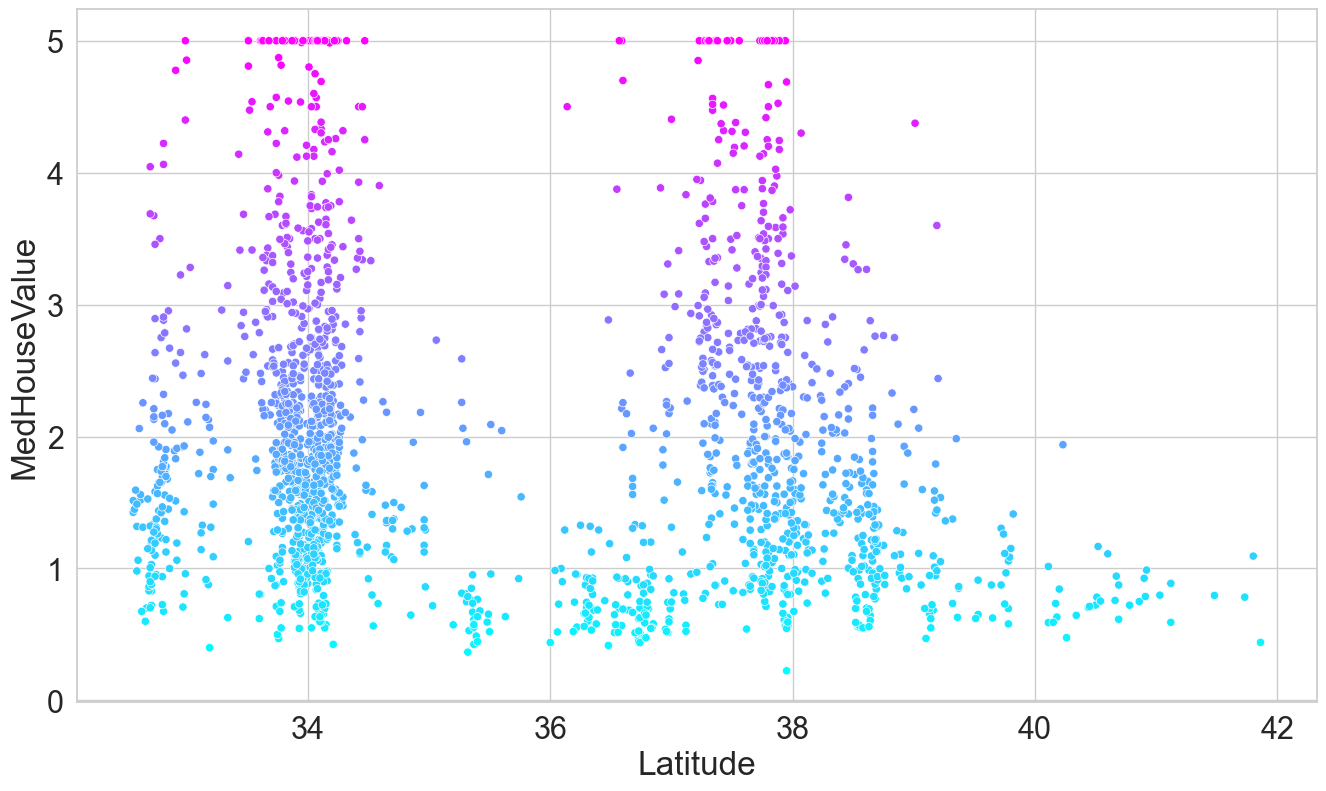

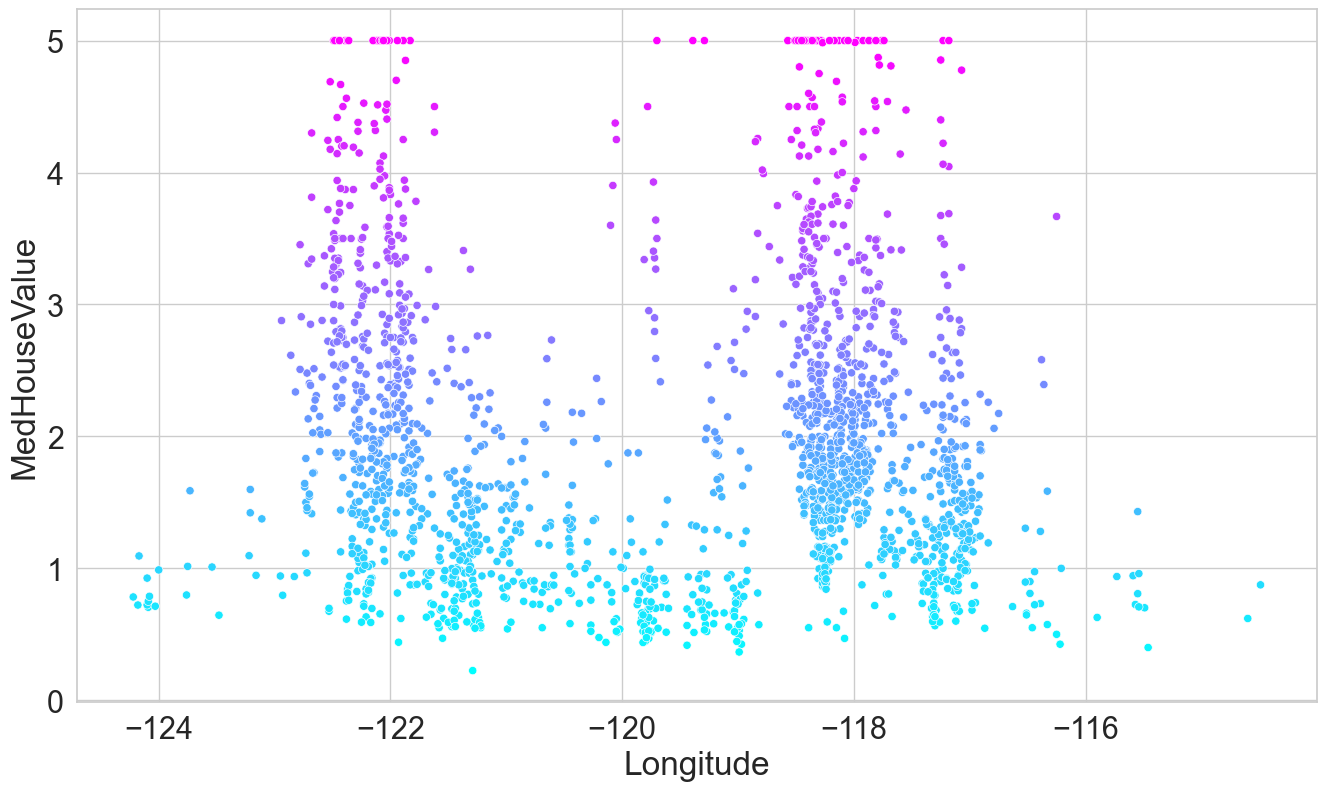

In [18]:
# display the scatter plot
for feature in california.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature,y='MedHouseValue', hue='MedHouseValue',palette='cool', legend=False)

## Split Data

In [19]:
#import modules
from sklearn.model_selection import train_test_split

# split the data into training and testing sections
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

In [20]:
# confirm 75%-%25 split fot train-test data
X_train.shape

(15480, 8)

In [21]:
# confirm 75%-%25 split fot train-test data
X_test.shape

(5160, 8)

## Train the Model

In [22]:
# import modules
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [24]:
# produce coefficients for each feature
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.4377030215382206
  HouseAge: 0.009216834565797749
  AveRooms: -0.10732526637360926
 AveBedrms: 0.6117133073918087
Population: -5.756822009275742e-06
  AveOccup: -0.003384566465716442
  Latitude: -0.4194818609649067
 Longitude: -0.4337713349874023


In [25]:
# find the intercept
linear_regression.intercept_

-36.8829506560556

## Test the Model

In [27]:
# compare the predicted and expected values
predicted = linear_regression.predict(X_test)

expected = y_test

predicted[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [28]:
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

## Visualize the Expected vs. the Predicted Prices

In [30]:
# create a dataframe with columns for expected values and predicted values
df = pd.DataFrame()

df['Expected'] = pd.Series(expected)

df['Predicted'] = pd.Series(predicted)

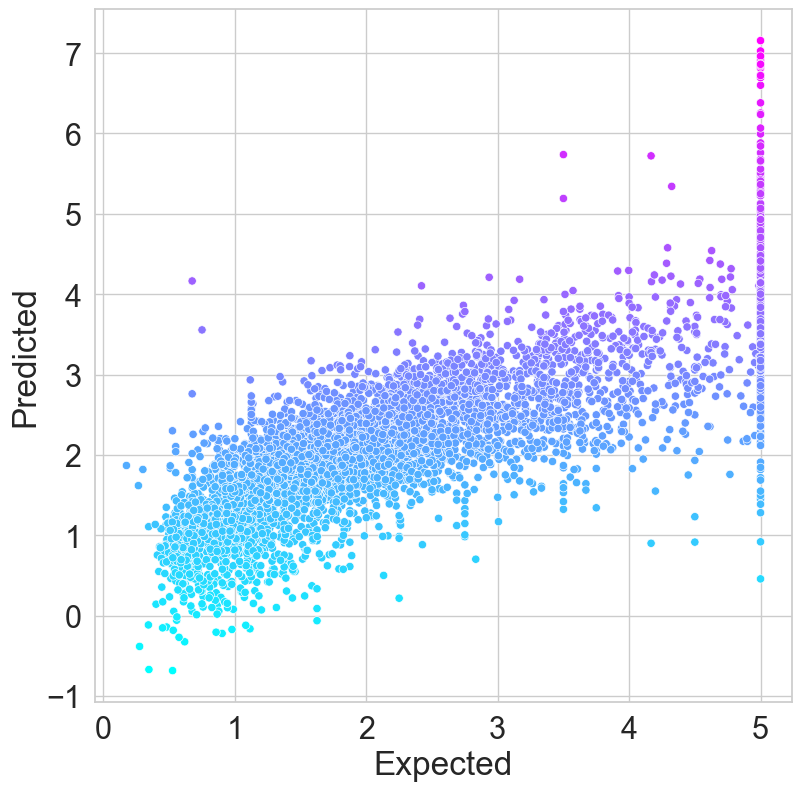

In [31]:
# plot the data with x:expected values and y:predicted values
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

In [32]:
# set the scale for the axes to be the same
start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

(-0.6830978604144633, 7.155719818496806)

In [33]:
axes.set_ylim(start, end)

(-0.6830978604144633, 7.155719818496806)

<Axes: xlabel='Expected', ylabel='Predicted'>

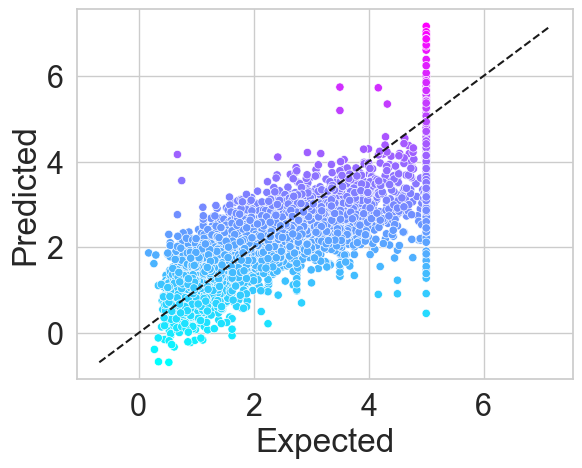

In [35]:
# plot
line = plt.plot([start, end], [start, end], 'k--')

sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

In [36]:
# determine the coeffiecient of determination
from sklearn import metrics

metrics.r2_score(expected, predicted)

0.6008983115964333

### The closer the coefficient of determination is to 1.0, the better the model. Here is the model's mean squared error:

In [37]:
metrics.mean_squared_error(expected, predicted)

0.5350149774449117

### Determine the best model:

In [38]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {'LinearRegression': linear_regression, 'ElasticNet': ElasticNet(), 'Lasso': Lasso(), 'Ridge': Ridge()}

In [39]:
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=california.data, y=california.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


#### Conclusion: The LinearRegression and Ridge appear to be the best models